__Questions 1:__
Pandas Assignment

How to import pandas and check the version?

How to convert the index of a series into a column of a dataframe?

How to combine many series to form a dataframe?

How to assign a name to the series’ index?

How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?

What is qcut() in Pandas?

How to find the positions of numbers that are multiples of 3 from a series?

How to stack two series vertically and horizontally ?

How to get the day of month, week number, day of year and day of week from a series of date strings?

How to compute the euclidean distance between two series?

How to use apply function on existing columns?

In [3]:
#How to import pandas and check the version?

In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

1.0.4


In [4]:
#How to convert the index of a series into a column of a dataframe?

In [8]:
subject = {'Course':['DataScience','AIML','Java','SQL','Python'],
        'Fees':[1000,8000,6000,2000,4000]
        }

In [9]:
df = pd.DataFrame(subject, columns = ['Course','Fees'], index = ['Item_1','Item_2','Item_3','Item_4','Item_5'])

In [10]:
print(df)

             Course  Fees
Item_1  DataScience  1000
Item_2         AIML  8000
Item_3         Java  6000
Item_4          SQL  2000
Item_5       Python  4000


In [11]:
#converting the index to column

In [13]:
df.reset_index(inplace=True) #inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. 

In [14]:
print(df)

   level_0   index       Course  Fees
0        0  Item_1  DataScience  1000
1        1  Item_2         AIML  8000
2        2  Item_3         Java  6000
3        3  Item_4          SQL  2000
4        4  Item_5       Python  4000


In [17]:
df=df.rename(columns={'index':'Items'})

In [18]:
print(df)

   level_0   Items       Course  Fees
0        0  Item_1  DataScience  1000
1        1  Item_2         AIML  8000
2        2  Item_3         Java  6000
3        3  Item_4          SQL  2000
4        4  Item_5       Python  4000


In [19]:
df=df.rename(columns={'level_0':'index'})
print(df)

   index   Items       Course  Fees
0      0  Item_1  DataScience  1000
1      1  Item_2         AIML  8000
2      2  Item_3         Java  6000
3      3  Item_4          SQL  2000
4      4  Item_5       Python  4000


In [20]:
#How to combine many series to form a dataframe?

In [23]:
student = pd.Series(['raju','latha','rekha','Govind',
                    'Zubair','Pravin','Sanket','Ramesh',
                    'Mrunmay','Deepak','Bilal','Mohan'], name = 'Students')
subject = pd.Series(['AIML','Python','BA','MBA',
                    'Salon','Hotel','Buisness','Engineer',
                    'Analytics','Support','ERP','C Programmer'],
                    name = 'Subject')
score= pd.Series([80,90,100,70,
                 95,82,60,99,
                 71,76,79,98], name = 'Score')

In [24]:
df1 = pd.concat([student,subject,score], axis=1)
print(df1)

   Students       Subject  Score
0   raju          AIML     80
1    latha        Python     90
2   rekha            BA    100
3    Govind           MBA     70
4    Zubair         Salon     95
5    Pravin         Hotel     82
6    Sanket      Buisness     60
7    Ramesh      Engineer     99
8   Mrunmay     Analytics     71
9    Deepak       Support     76
10    Bilal           ERP     79
11    Mohan  C Programmer     98


__How to assign a name to the series’ index?__

In [25]:
df2 = pd.Series(['Delhi','Mumbai','Pune','Varanasi',
                'Gaya','Shimla','Goa','Chennai'])
print(df2)

0       Delhi
1      Mumbai
2        Pune
3    Varanasi
4        Gaya
5      Shimla
6         Goa
7     Chennai
dtype: object


In [26]:
df2.rename_axis('Places')

Places
0       Delhi
1      Mumbai
2        Pune
3    Varanasi
4        Gaya
5      Shimla
6         Goa
7     Chennai
dtype: object

In [30]:
df3 = pd.DataFrame({'num_legs':[4,4,2],
                'num_arms':[0,0,2]},
               ['dog','cat','monkey'])
df3

,num_legs,num_arms
dog,4,0
cat,4,0
monkey,2,2


In [31]:
df3 = df3.rename_axis('animal')

In [32]:
df3

,num_legs,num_arms
animal,,
dog,4,0
cat,4,0
monkey,2,2


In [34]:
df3 = df3.rename_axis('limbs', axis='columns')
df3

limbs,num_legs,num_arms
animal,,
dog,4,0
cat,4,0
monkey,2,2


__How to get the minimum, 25th percentile, median, 75th, and max of a numeric series?__

In [36]:
#/c/smartphone_activity_dataset.csv
smart_phone = pd.read_csv('/c/smartphone_activity_dataset.csv')

In [37]:
smart_phone

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
0,0.289,-0.0203,-0.1330,-0.995,-0.9830,-0.914,-0.995,-0.983,-0.924,-0.93500,...,-0.2990,-0.710,-0.1130,0.03040,-0.465,-0.0184,-0.841,0.180,-0.0586,5
1,0.278,-0.0164,-0.1240,-0.998,-0.9750,-0.960,-0.999,-0.975,-0.958,-0.94300,...,-0.5950,-0.861,0.0535,-0.00743,-0.733,0.7040,-0.845,0.180,-0.0543,5
2,0.280,-0.0195,-0.1130,-0.995,-0.9670,-0.979,-0.997,-0.964,-0.977,-0.93900,...,-0.3910,-0.760,-0.1190,0.17800,0.101,0.8090,-0.849,0.181,-0.0491,5
3,0.279,-0.0262,-0.1230,-0.996,-0.9830,-0.991,-0.997,-0.983,-0.989,-0.93900,...,-0.1170,-0.483,-0.0368,-0.01290,0.640,-0.4850,-0.849,0.182,-0.0477,5
4,0.277,-0.0166,-0.1150,-0.998,-0.9810,-0.990,-0.998,-0.980,-0.990,-0.94200,...,-0.3510,-0.699,0.1230,0.12300,0.694,-0.6160,-0.848,0.185,-0.0439,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310,-0.0534,-0.0991,-0.288,-0.1410,-0.215,-0.356,-0.149,-0.232,0.18500,...,-0.3760,-0.751,-0.3370,0.34600,0.885,-0.6990,-0.652,0.275,0.1850,2
10295,0.363,-0.0392,-0.1060,-0.305,0.0281,-0.196,-0.374,-0.030,-0.270,0.18500,...,-0.3200,-0.700,-0.7370,-0.37300,-0.657,0.3230,-0.655,0.274,0.1820,2
10296,0.350,0.0301,-0.1160,-0.330,-0.0421,-0.250,-0.388,-0.133,-0.347,0.00747,...,-0.1190,-0.467,-0.1820,0.08860,0.697,0.3630,-0.655,0.274,0.1810,2
10297,0.238,0.0185,-0.0965,-0.323,-0.2300,-0.208,-0.392,-0.280,-0.289,0.00747,...,-0.2050,-0.618,0.4450,-0.81900,0.929,-0.0084,-0.660,0.265,0.1880,2


In [38]:
smart_phone.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274348,-0.017743,-0.108925,-0.607780,-0.510192,-0.613061,-0.633593,-0.525695,-0.614993,-0.466731,...,-0.298587,-0.617704,0.007700,0.002652,0.017683,-0.009221,-0.496526,0.063253,-0.054283,3.624624
std,0.067629,0.037129,0.053040,0.438693,0.500239,0.403662,0.413327,0.484204,0.399031,0.538709,...,0.320197,0.308792,0.336588,0.447364,0.616186,0.484774,0.511153,0.305467,0.268898,1.743695
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.263000,-0.024900,-0.121000,-0.992000,-0.977000,-0.979000,-0.993000,-0.977000,-0.979000,-0.936000,...,-0.536000,-0.842000,-0.125000,-0.287000,-0.493000,-0.389000,-0.817000,0.002150,-0.132000,2.000000
50%,0.277000,-0.017200,-0.109000,-0.943000,-0.835000,-0.851000,-0.948000,-0.844000,-0.845000,-0.875000,...,-0.335000,-0.703000,0.008150,0.007670,0.017200,-0.007190,-0.716000,0.182000,-0.003880,4.000000
75%,0.288000,-0.010600,-0.097600,-0.250000,-0.057300,-0.279000,-0.302000,-0.087450,-0.288000,-0.014650,...,-0.113000,-0.488000,0.149000,0.291500,0.536000,0.366000,-0.521500,0.251000,0.103000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


__What is qcut() in Pandas?__

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. ... The simplest use of qcut is to define the number of quantiles

In [41]:
smart_phone['Rating'] = pd.qcut(smart_phone.activity,q=3,labels=['Fair','Good','Best'])
smart_phone

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,activity,Rating
0,0.289,-0.0203,-0.1330,-0.995,-0.9830,-0.914,-0.995,-0.983,-0.924,-0.93500,...,-0.710,-0.1130,0.03040,-0.465,-0.0184,-0.841,0.180,-0.0586,5,Good
1,0.278,-0.0164,-0.1240,-0.998,-0.9750,-0.960,-0.999,-0.975,-0.958,-0.94300,...,-0.861,0.0535,-0.00743,-0.733,0.7040,-0.845,0.180,-0.0543,5,Good
2,0.280,-0.0195,-0.1130,-0.995,-0.9670,-0.979,-0.997,-0.964,-0.977,-0.93900,...,-0.760,-0.1190,0.17800,0.101,0.8090,-0.849,0.181,-0.0491,5,Good
3,0.279,-0.0262,-0.1230,-0.996,-0.9830,-0.991,-0.997,-0.983,-0.989,-0.93900,...,-0.483,-0.0368,-0.01290,0.640,-0.4850,-0.849,0.182,-0.0477,5,Good
4,0.277,-0.0166,-0.1150,-0.998,-0.9810,-0.990,-0.998,-0.980,-0.990,-0.94200,...,-0.699,0.1230,0.12300,0.694,-0.6160,-0.848,0.185,-0.0439,5,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310,-0.0534,-0.0991,-0.288,-0.1410,-0.215,-0.356,-0.149,-0.232,0.18500,...,-0.751,-0.3370,0.34600,0.885,-0.6990,-0.652,0.275,0.1850,2,Fair
10295,0.363,-0.0392,-0.1060,-0.305,0.0281,-0.196,-0.374,-0.030,-0.270,0.18500,...,-0.700,-0.7370,-0.37300,-0.657,0.3230,-0.655,0.274,0.1820,2,Fair
10296,0.350,0.0301,-0.1160,-0.330,-0.0421,-0.250,-0.388,-0.133,-0.347,0.00747,...,-0.467,-0.1820,0.08860,0.697,0.3630,-0.655,0.274,0.1810,2,Fair
10297,0.238,0.0185,-0.0965,-0.323,-0.2300,-0.208,-0.392,-0.280,-0.289,0.00747,...,-0.618,0.4450,-0.81900,0.929,-0.0084,-0.660,0.265,0.1880,2,Fair


__How to find the positions of numbers that are multiples of 3 from a series?__

In [42]:
import numpy as np

In [46]:
nos= pd.Series(np.random.randint(1,10,9))
nos

0    5
1    8
2    1
3    3
4    7
5    2
6    2
7    1
8    5
dtype: int64

In [51]:
mul_3 = [n for n in range(1,10) if n % 3 == 0]
print(mul_3)

[3, 6, 9]


__How to stack two series vertically and horizontally ?__

In [1]:
import pandas as pd

In [2]:
s1 = pd.Series(['J','a','g','d','e','e','p'])
s1

0    J
1    a
2    g
3    d
4    e
5    e
6    p
dtype: object

In [3]:
s2 = pd.Series([10,9,8,7,6,5,4])
s2

0    10
1     9
2     8
3     7
4     6
5     5
6     4
dtype: int64

In [6]:
df = pd.concat([s1,s2], axis = 1)
display(df)

,0,1
0,J,10
1,a,9
2,g,8
3,d,7
4,e,6
5,e,5
6,p,4


In [7]:
df = pd.concat([s1,s2], axis = 0)
display(df)

0     J
1     a
2     g
3     d
4     e
5     e
6     p
0    10
1     9
2     8
3     7
4     6
5     5
6     4
dtype: object

__How to get the day of month, week number, day of year and day of week from a series of date strings?__

In [8]:
from dateutil.parser import parse

In [12]:
dt1 = pd.Series(['01 Jan 2021','10-01-2021','20210208','2021/01/07','2021-01-01','2021-01-10T00:20'])

In [13]:
dt1

0         01 Jan 2021
1          10-01-2021
2            20210208
3          2021/01/07
4          2021-01-01
5    2021-01-10T00:20
dtype: object

In [16]:
dt2 = dt1.map(lambda x:parse(x))
print('Date of month:', dt2.dt.day.tolist())

Date of month: [1, 1, 8, 7, 1, 10]


In [17]:
print('Date of year:', dt2.dt.dayofyear.tolist())

Date of year: [1, 274, 39, 7, 1, 10]


In [18]:
print('Week number:', dt2.dt.weekofyear.tolist())

Week number: [53, 39, 6, 1, 53, 1]


In [30]:
print('Day of week:', dt2.dt.day_name().tolist())

Day of week: ['Friday', 'Friday', 'Monday', 'Thursday', 'Friday', 'Sunday']


__How to compute the euclidean distance between two series?__

In [32]:
a = pd.Series([1,2,3,4,5,6,7,8,9,10])
b = pd.Series([11,12,13,14,15,16,17,18,19,20])
print(a)
print(b)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64
0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
9    20
dtype: int64


In [35]:
#Euclidean distance between
import numpy as np
print(np.linalg.norm(a-b))

31.622776601683793


__How to use apply function on existing columns?__

In [48]:
df = pd.DataFrame([{'a': 15, 'b': 15, 'c': 5}, {'a': 20, 'b': 10, 'c': 7}, {'a': 25, 'b': 30, 'c': 9}])
df

,a,b,c
0,15,15,5
1,20,10,7
2,25,30,9


In [49]:
df['a'] = df['a'].apply(lambda x: x+1)
df

,a,b,c
0,16,15,5
1,21,10,7
2,26,30,9


__Questions 2 :__
__Pandas Assignment__

With respect to Earthquakes.csv "http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv"

Use Pandas' read_csv function directly on this url to open it as a DataFrame

Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used
as the index

Use describe to get the basic statistics of all the columns.

Use sort_values to get the top 20 earthquakes by magnitude.

Find the 10 states / countries with the highest number of earthquakes.

Find the top 10 states / countries where the strongest and weakest earthquakes occured.

In [3]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/c/usgs_earthquakes_2014.csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [4]:
df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


In [8]:
df[['time','id']]

,time,id
0,2014-01-31 23:53:37.000,ak11155107
1,2014-01-31 23:48:35.452,nn00436847
2,2014-01-31 23:47:24.000,ak11151142
3,2014-01-31 23:30:54.000,ak11151135
4,2014-01-31 23:30:52.210,ci37171541
...,...,...
120103,2014-12-01 00:10:16.000,ak11453391
120104,2014-12-01 00:09:39.000,ak11453395
120105,2014-12-01 00:09:25.350,nc72358451
120106,2014-12-01 00:05:54.000,ak11453390


__Use describe to get the basic statistics of all the columns.__

In [9]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


__Use sort_values to get the top 20 earthquakes by magnitude.__

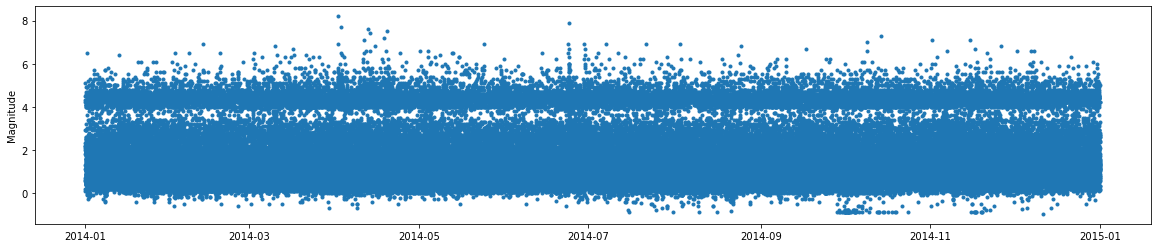

In [5]:
import matplotlib.pyplot as plt
df.time = pd.to_datetime(df.time)
df.sort_values("time", inplace=True)
fig = plt.figure()
fig.set_size_inches(20, 4)
plt.plot(df.time, df.mag, ".");
plt.ylabel("Magnitude");

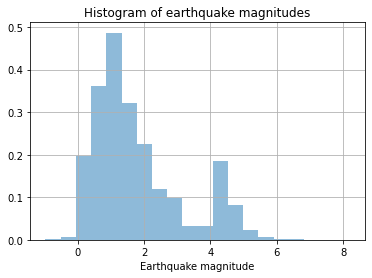

In [6]:
df.mag.hist(density=True, alpha=0.5, bins=20)
plt.xlabel("Earthquake magnitude")
plt.title("Histogram of earthquake magnitudes");

In [11]:
df.sort_values("place")

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
51185,2014-06-21 17:32:42.500,36.888167,-121.631833,8.65,2.26,md,75.0,51.000000,0.032180,0.09,nc,nc72241541,2015-01-30T18:35:46.816Z,"0km E of Aromas, California",earthquake
56398,2014-06-04 13:09:32.610,33.917333,-117.894500,3.04,1.24,ml,30.0,87.000000,0.037060,0.21,ci,ci15508737,2014-06-04T20:50:05.950Z,"0km E of Brea, California",earthquake
39520,2014-05-25 21:05:09.270,41.967000,21.247800,6.94,4.00,ml,NaN,NaN,NaN,1.52,us,usb000r3p3,2015-01-30T09:59:24.069Z,"0km E of Bukovik, Macedonia",earthquake
104083,2014-11-20 20:47:13.960,36.555167,-121.921167,12.37,2.17,md,46.0,186.000000,0.044160,0.08,nc,nc72350391,2015-01-31T04:31:29.147Z,"0km E of Carmel-by-the-Sea, California",earthquake
37889,2014-05-31 11:46:51.700,47.611500,-122.705000,14.60,0.20,Md,NaN,255.600000,0.080848,0.09,uw,uw60055108,2014-06-02T20:46:21.216Z,"0km E of Chico, Washington",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51354,2014-06-21 03:06:34.100,44.895100,-111.519000,6.90,1.60,mc,22.0,53.999996,0.089832,0.15,mb,mb14580941,2014-06-23T22:40:54.527Z,western Montana,earthquake
37826,2014-05-31 16:04:47.100,47.202600,-112.517600,17.30,1.30,mc,15.0,194.399984,0.354834,0.16,mb,mb14425386,2014-06-12T22:41:00.834Z,western Montana,earthquake
51486,2014-06-20 15:13:17.300,45.327600,-112.619100,9.70,1.20,mc,9.0,161.999987,0.038628,0.03,mb,mb14397101,2014-06-23T22:40:44.850Z,western Montana,earthquake
42718,2014-05-14 21:55:03.600,32.901700,-100.734900,4.38,2.80,mb_lg,NaN,63.000000,0.960000,0.86,us,usb000qqw6,2014-08-09T02:53:42.000Z,western Texas,earthquake


In [18]:
df.sort_values(by=['time','place'])
df.head(20)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
9237,2014-01-01 00:01:16.610,19.086800,120.238900,10.07,5.10,mb,NaN,29.000000,3.794000,0.85,us,usc000lv5e,2014-03-07T00:25:53.000Z,"76km NNW of Davila, Philippines",earthquake
9236,2014-01-01 00:05:28.830,-18.496500,-175.528200,217.90,4.50,mb,NaN,41.000000,5.337000,0.60,us,usc000lv5j,2014-03-07T00:25:53.000Z,"163km W of Neiafu, Tonga",earthquake
9235,2014-01-01 00:05:55.000,44.408000,-122.749800,0.00,2.20,Md,NaN,180.000000,0.116781,0.07,uw,uw60664271,2014-01-01T05:52:47.158Z,"1km NW of Sweet Home, Oregon",quarry
9234,2014-01-01 00:10:10.200,38.805200,-122.853500,7.50,0.70,Md,NaN,111.600000,0.008983,0.11,nc,nc72133841,2014-01-01T00:46:05.743Z,"8km WNW of The Geysers, California",earthquake
9233,2014-01-01 00:24:43.000,60.087200,-153.018400,105.80,2.00,ml,NaN,NaN,NaN,0.77,ak,ak10992830,2014-01-07T17:53:39.525Z,"46km SSW of Redoubt Volcano, Alaska",earthquake
9232,2014-01-01 00:36:30.200,19.324700,-155.035300,1.90,2.10,Ml,NaN,208.800000,0.089832,0.14,hv,hv60614021,2014-01-02T23:30:09.143Z,"20km SW of Leilani Estates, Hawaii",earthquake
9231,2014-01-01 00:36:42.400,38.832000,-122.777700,1.10,1.10,Md,NaN,90.000000,0.008983,0.05,nc,nc72133846,2014-01-01T00:38:24.983Z,"4km WNW of Cobb, California",earthquake
9230,2014-01-01 00:39:24.600,46.092700,-122.518800,15.00,0.20,Md,NaN,183.600000,0.089832,0.10,uw,uw60664276,2014-01-01T06:02:14.212Z,"21km NNW of Amboy, Washington",earthquake
9229,2014-01-01 00:47:01.000,63.236000,-144.752200,11.70,1.30,ml,NaN,NaN,NaN,0.57,ak,ak10992831,2014-01-07T17:53:41.260Z,"74km SSE of Deltana, Alaska",earthquake
9228,2014-01-01 00:53:59.130,33.462500,-116.472833,13.83,0.10,ml,15.0,153.000000,0.112800,0.10,ci,ci11408434,2014-01-02T19:31:53.880Z,"21km ESE of Anza, California",earthquake


__Find the 10 states / countries with the highest number of earthquakes.__

<AxesSubplot:>

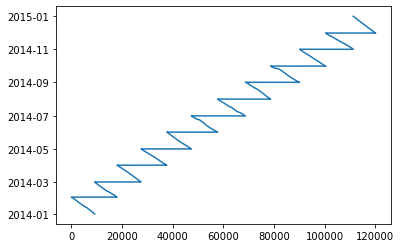

In [22]:
df['time'].plot()

<AxesSubplot:>

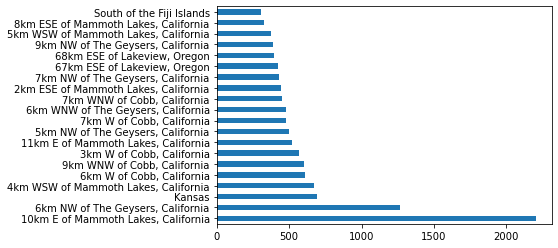

In [23]:
df['place'].value_counts()[:20].plot(kind='barh')

In [26]:
df['Earthquake Magnitude'] = pd.qcut(df.mag,q=3,labels=['low','medium','high'])
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,Earthquake Magnitude
9237,2014-01-01 00:01:16.610,19.086800,120.238900,10.07,5.10,mb,NaN,29.00,3.794000,0.85,us,usc000lv5e,2014-03-07T00:25:53.000Z,"76km NNW of Davila, Philippines",earthquake,high
9236,2014-01-01 00:05:28.830,-18.496500,-175.528200,217.90,4.50,mb,NaN,41.00,5.337000,0.60,us,usc000lv5j,2014-03-07T00:25:53.000Z,"163km W of Neiafu, Tonga",earthquake,high
9235,2014-01-01 00:05:55.000,44.408000,-122.749800,0.00,2.20,Md,NaN,180.00,0.116781,0.07,uw,uw60664271,2014-01-01T05:52:47.158Z,"1km NW of Sweet Home, Oregon",quarry,high
9234,2014-01-01 00:10:10.200,38.805200,-122.853500,7.50,0.70,Md,NaN,111.60,0.008983,0.11,nc,nc72133841,2014-01-01T00:46:05.743Z,"8km WNW of The Geysers, California",earthquake,low
9233,2014-01-01 00:24:43.000,60.087200,-153.018400,105.80,2.00,ml,NaN,NaN,NaN,0.77,ak,ak10992830,2014-01-07T17:53:39.525Z,"46km SSW of Redoubt Volcano, Alaska",earthquake,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111258,2014-12-31 23:28:08.420,38.694700,-118.038800,15.00,1.27,ml,5.0,261.21,0.285000,NaN,nn,nn00474711,2014-12-31T23:29:54.189Z,"21km SSW of Gabbs, Nevada",earthquake,medium
111257,2014-12-31 23:33:45.600,37.634500,-118.875000,8.52,0.87,md,22.0,86.00,0.018200,0.03,nc,nc72373201,2015-01-02T22:22:03.921Z,"8km E of Mammoth Lakes, California",earthquake,low
111256,2014-12-31 23:39:47.670,38.847168,-122.829666,2.24,0.81,md,7.0,78.00,0.008961,0.02,nc,nc72373206,2015-01-01T01:44:05.056Z,"9km WNW of Cobb, California",earthquake,low
111255,2014-12-31 23:48:23.910,38.846500,-122.826668,2.48,0.55,md,10.0,64.00,0.008550,0.01,nc,nc72373211,2015-01-01T01:56:02.965Z,"9km WNW of Cobb, California",earthquake,low


In [41]:
%matplotlib tk
df1=df[:10]
df1.plot('Earthquake Magnitude',kind = 'bar')

<AxesSubplot:xlabel='Earthquake Magnitude'>

In [45]:
df1=df[:10]
df1.plot('place',
        colormap='gist_rainbow')

<AxesSubplot:xlabel='place'>

__Questions 3 :__

Matplotlib Assignment

With respect to iris dataset,

Describing the data

Plot the frequency of the three species in the Iris Dataset.

Plot the Pie of the three species in the Iris Dataset.

Combining Box and Strip Plots for Species vs sepal length.

find out the correlation between different features in the dataset.

Plot Venn diagram for sepal length vs sepal width.

In [36]:
#url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#df = pd.read_csv(url, names=names)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/home/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


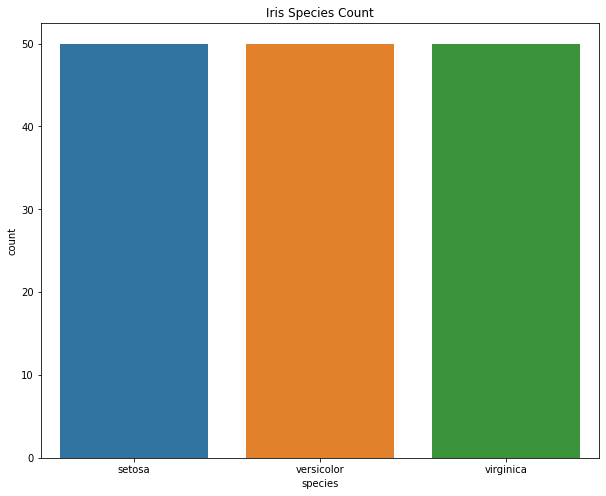

In [38]:
a=plt.subplots(1,1,figsize=(10,8))
sns.countplot('species',data=df)
plt.title("Iris Species Count")
plt.show()

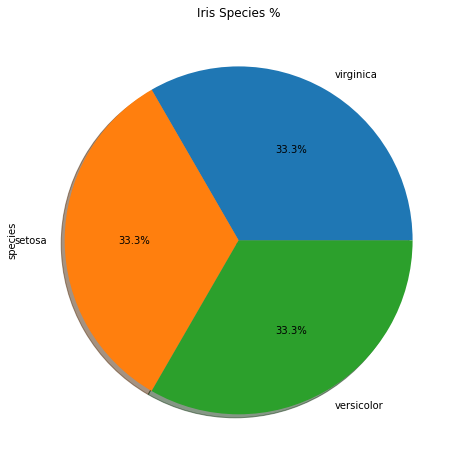

In [39]:
df['species'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True, figsize=(10,8))
plt.title('Iris Species %')
plt.show()

<AxesSubplot:title={'center':'sepal_length'}, xlabel='species'>

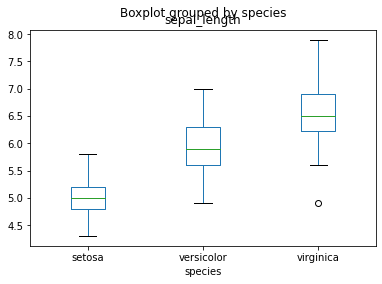

In [40]:
df.boxplot(by ='species', column =['sepal_length'], grid = False) 

In [42]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

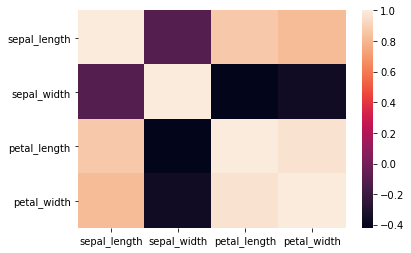

In [43]:
sns.heatmap(corr)

__Plot Venn diagram for sepal length vs sepal width.__

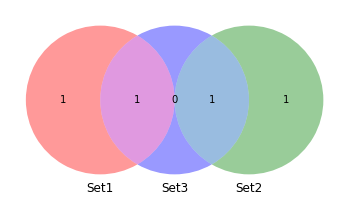

In [9]:
fig = plt.figure()
set1 = set(['sepal_length','petal_length'])
set2 = set(['sepal_width','petal_width'])
set3 = set(['sepal_length','sepal_width'])

v = venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))

__Questions 4 :__
Pandas+Matplotlib Assignment

Download the dataset from:
https://www.kaggle.com/worldbank/world-development-indicators

How many UNIQUE country names are there ?

Are there the same number of country codes ?

Are there many indicators or few ?

How many years of data do we have ?

What's the range of years?

ScatterPlot for comparing GDP against CO2 emissions (per capita)

In [ ]:
import pandas as pd
df = pd.read_csv('Country.csv')
df

In [20]:
unique_country=df['ShortName'].unique()
print('Unique country names are : ',unique_country.tolist())

Unique country names are :  ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Dem. People's Rep. Korea", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Esto

__Are there the same number of country codes ?__


In [23]:
df['CountryCode'].duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
242    False
243    False
244    False
245    False
246    False
Name: CountryCode, Length: 247, dtype: bool

In [33]:
import sys
'pandas' in sys.modules

True

In [ ]:
#pip install git+https://github.com/pydata/pandas-datareader.git

In [35]:
pip install pandas-datareader

     |████████████████████████████████| 107 kB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
conda install pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sadusumalli\Anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37haa95532_0         2.9 MB
    pandas-datareader-0.9.0    |             py_0          72 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.9.0-py_0

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.9.2-py37haa95532_0




conda-4.9.2          | 2.9 MB    |            |   0% 
conda-4.9.2          | 2.9 MB    |            |   1% 
conda-4.9.2          | 2.9 MB    | #7         |  17% 
conda-4.9.2        

In [7]:
#import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web

In [ ]:
df2= df.get_indicators()